A* Algorithm is one of the best and popular techniques used for path finding and graph traversals. A* is based on using heuristic methods to achieve optimality and completeness, and is a variant of the best-first algorithm.
A lot of games and web-based maps use this algorithm for finding the shortest path efficiently.

A* only performs a step if it seems promising and reasonable, according to its functions, unlike other graph-traversal algorithms. It runs towards the goal and doesn't consider any non-optimal steps if it doesn't have to consider them.

This makes A* very useful for artificially intelligent systems - especially in Machine Learning and game development since these systems replicate real-world scenarios. The efficiency of A* is highly dependent on the heuristic value h(n), and depending on the type of problem, we may need to use a different heuristic function for it to find the optimal solution.

It maintains a tree of paths originating at the start node.
It extends those paths one edge at a time.
It continues until its termination criterion is satisfied.

In [2]:
from collections import deque

class Graph:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'Romania': 3,
            'Greece': 3,
            'Turkey': 3,
            'Spain': 3,
            'Austria': 3,
            'Italy': 3, 
            'France': 3,
            'Netherlands': 3,
            'Germany': 3,
            'Poland': 3   
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        open_list = set([start_node])
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            '''
A* Algorithm extends the path that minimizes the following function-
Each time A* enters a state, it calculates the cost, f(n)
f(n) = g(n) + h(n)
where (n) is the neighboring node, g(n) being the value of the shortest path from the start node to node n, 
and h(n) being a heuristic approximation of the node's value.
            
            '''
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [3]:
'''

The numbers written on edges represent the distance between the nodes.

Find the most cost-effective path to reach from start node to final node.

'''

'\n\nThe numbers written on edges represent the distance between the nodes.\n\nFind the most cost-effective path to reach from start node to final node.\n\n'

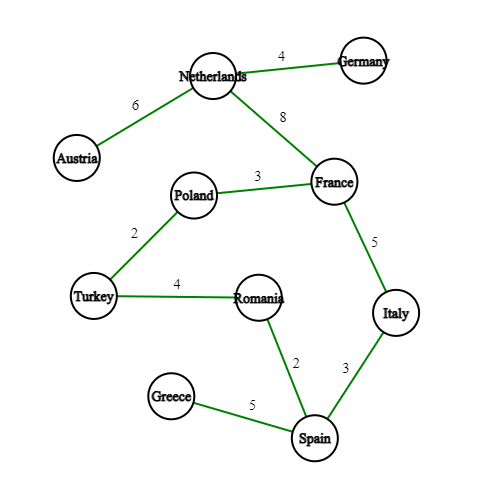

In [9]:
adjacency_list = {
    'Romania': [('Spain', 2), ('Turkey', 4)],
    'Austria': [('Netherlands', 6)],
    'Italy': [('France', 5), ('Spain', 3)],
    'France':[('Netherlands', 8), ('Poland',3), ('Italy',5)],
    'Netherlands':[('Germany',4), ('Austria', 6), ('France',8)],
    'Poland':[('France', 3), ('Turkey',2)],
    'Greece':[('Spain', 5)],
    'Germany':[('Netherlands',4)],
    'Turkey':[('Romania', 4), ('Poland',2)],
    'Spain':[('Italy',3),('Romania',2),('Greece',5)]
}
graph1 = Graph(adjacency_list)

In [10]:
graph1.a_star_algorithm('Netherlands', 'Spain')

Path found: ['Netherlands', 'France', 'Italy', 'Spain']


['Netherlands', 'France', 'Italy', 'Spain']

In [11]:
graph1.a_star_algorithm('Romania', 'France')

Path found: ['Romania', 'Turkey', 'Poland', 'France']


['Romania', 'Turkey', 'Poland', 'France']